In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch_dct as dct

from lib.tools import *
from lib.jpeg import *
from lib.decomposition import *
from lib.regression import *
from lib.sketchml import *

# Low rank tensor

In [2]:
import random
random.seed(5)

In [3]:
tensor_size  = 128*128*3

In [4]:
tensor = torch.zeros([128,128*3])
for i in range(128):
    for j in range(128*3):
        if random.random()>0.7:
            tensor[i][j] = random.gauss(1,0.3)
tensor = tensor.reshape([128,128,3])

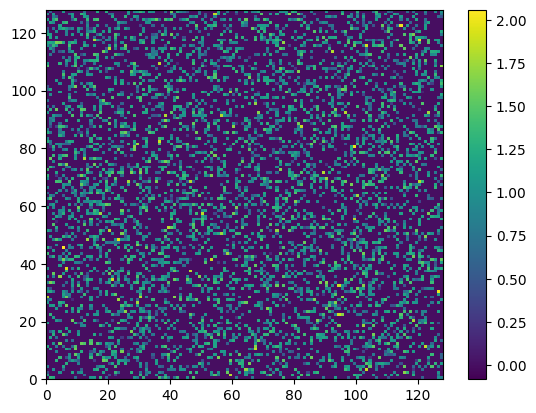

In [5]:
plt.figure()
plt.pcolormesh(tensor[:,:,0])
plt.colorbar()

## Get tensor charateristics

In [6]:
# actual_rank= calculate_cp_rank(tensor.numpy())
# print("The acutal rank of the tensor is: ", actual_rank)

In [7]:
sparsity = calculate_sparsity(tensor.numpy())
print("The sparsity of the tensor is: ", sparsity)

The sparsity of the tensor is:  0.7012736002604166


## Tensor compression

#### Jpeg

In [8]:
lowrank_jpeg_ratio = []
lowrank_jpeg_snr =[]
lowrank_jpeg_mse = []

In [9]:
for i in range(10):
    jpeg_quality = 55 + i *5
    normalize_base, scale,zero_point, encoded_data, compressed_size_jpeg = compressor_jpeg(tensor, jpeg_quality)
    print("Compressed size: ", compressed_size_jpeg)

    reconstructed_tensor_jpeg = decompressor_jpeg(tensor.shape,normalize_base, scale,zero_point, encoded_data )
    snr_jpeg = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_jpeg.numpy())
    mse_jpeg = calculate_mse(tensor.numpy(), reconstructed_tensor_jpeg.numpy())
    print("Reconstruction snr (dB): ", snr_jpeg)
    print("Reconstruction mse: ", mse_jpeg)
    
    lowrank_jpeg_ratio.append((tensor_size*4) / compressed_size_jpeg)
    lowrank_jpeg_snr.append(snr_jpeg)
    lowrank_jpeg_mse.append(mse_jpeg / torch.max(tensor).item())

Compressed size:  11891
Reconstruction snr (dB):  4.998146295547485
Reconstruction mse:  0.1027835
Compressed size:  13011
Reconstruction snr (dB):  5.81300675868988
Reconstruction mse:  0.085199565
Compressed size:  14273
Reconstruction snr (dB):  6.807028651237488
Reconstruction mse:  0.06776964
Compressed size:  15776
Reconstruction snr (dB):  7.919715642929077
Reconstruction mse:  0.05245253
Compressed size:  17391
Reconstruction snr (dB):  9.168288707733154
Reconstruction mse:  0.03934678
Compressed size:  19583
Reconstruction snr (dB):  10.650694370269775
Reconstruction mse:  0.027968468
Compressed size:  22425
Reconstruction snr (dB):  12.359219789505005
Reconstruction mse:  0.018871918
Compressed size:  26744
Reconstruction snr (dB):  14.315024614334106
Reconstruction mse:  0.012029166
Compressed size:  35003
Reconstruction snr (dB):  16.20267152786255
Reconstruction mse:  0.007788807
Compressed size:  61206
Reconstruction snr (dB):  17.37385869026184
Reconstruction mse:  0.005

#### Tensor decomposition

In [10]:
lowrank_decomposition_ratio =[]
lowrank_decomposition_snr = []
lowrank_decomposition_mse = []

In [11]:
for i in range(20):
    decom_rank_ratio = 0.05*(i+1) +0.5
    factors, compressed_size_decomposition = compressor_decomposition_slice_quality(tensor,decom_rank_ratio)
    print("Compressed size: ", compressed_size_decomposition)
    reconstructed_tensor_decomposition = decompressor_decomposition_slice(tensor.shape, factors )
    snr_decomposition = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_decomposition.numpy())
    mse_decomposition = calculate_mse(tensor.numpy(), reconstructed_tensor_decomposition.numpy())
    print("Reconstruction snr (dB): ", snr_decomposition)
    print("Reconstruction mse: ", mse_decomposition)

    lowrank_decomposition_ratio.append((tensor_size*4) / compressed_size_decomposition)
    lowrank_decomposition_snr.append(snr_decomposition)
    lowrank_decomposition_mse.append(mse_decomposition / torch.max(tensor).item())

Compressed size:  134144
Reconstruction snr (dB):  6.773688197135925
Reconstruction mse:  0.06829191
Compressed size:  134144
Reconstruction snr (dB):  6.773688197135925
Reconstruction mse:  0.06829191
Compressed size:  134144
Reconstruction snr (dB):  6.773688197135925
Reconstruction mse:  0.06829191
Compressed size:  134144
Reconstruction snr (dB):  6.773688197135925
Reconstruction mse:  0.06829191
Compressed size:  134144
Reconstruction snr (dB):  6.773688197135925
Reconstruction mse:  0.06829191
Compressed size:  134144
Reconstruction snr (dB):  6.773688197135925
Reconstruction mse:  0.06829191
Compressed size:  201216
Reconstruction snr (dB):  136.20712280273438
Reconstruction mse:  7.780823e-15
Compressed size:  201216
Reconstruction snr (dB):  136.20712280273438
Reconstruction mse:  7.780823e-15
Compressed size:  201216
Reconstruction snr (dB):  136.20712280273438
Reconstruction mse:  7.780823e-15
Compressed size:  201216
Reconstruction snr (dB):  136.20712280273438
Reconstructi

#### Regression

In [12]:
lowrank_regression_ratio = []
lowrank_regression_snr = []
lowrank_regression_mse = []

In [13]:
for i in range(10):
    regression_rank = i+1
    factors, x_pos, x_neg, compressed_size_regression = compressor_regression(tensor, regression_rank)
    print("Compressed size: ", compressed_size_regression)

    reconstructed_tensor_regression = decompressor_regression(tensor.shape, factors, x_pos,x_neg )
    snr_regression = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_regression.numpy())
    mse_regression = calculate_mse(tensor.numpy(), reconstructed_tensor_regression.numpy())
    print("Reconstruction snr (dB): ", snr_regression)
    print("Reconstruction mse: ", mse_regression)

    lowrank_regression_ratio.append((tensor_size*4) / compressed_size_regression)
    lowrank_regression_snr.append(snr_regression)
    lowrank_regression_mse.append(mse_regression / torch.max(tensor).item())

Compressed size:  12800.0
Reconstruction snr (dB):  10.840673446655273
Reconstruction mse:  0.026771376
Compressed size:  13312.0
Reconstruction snr (dB):  10.87437629699707
Reconstruction mse:  0.026564425
Compressed size:  13824.0
Reconstruction snr (dB):  10.919475555419922
Reconstruction mse:  0.026289992
Compressed size:  14336.0
Reconstruction snr (dB):  10.96299409866333
Reconstruction mse:  0.026027873
Compressed size:  14848.0
Reconstruction snr (dB):  11.00100040435791
Reconstruction mse:  0.02580109
Compressed size:  15360.0
Reconstruction snr (dB):  11.038237810134888
Reconstruction mse:  0.025580809
Compressed size:  15872.0
Reconstruction snr (dB):  11.073660850524902
Reconstruction mse:  0.025373004
Compressed size:  16384.0
Reconstruction snr (dB):  11.119152307510376
Reconstruction mse:  0.025108615
Compressed size:  16896.0
Reconstruction snr (dB):  11.168110370635986
Reconstruction mse:  0.024827162
Compressed size:  17408.0
Reconstruction snr (dB):  11.2113213539123

#### Sketch ML

In [20]:
lowrank_sketchml_ratio = []
lowrank_sketchml_snr = []
lowrank_sketchml_mse = []

In [21]:
for i in range (10):
    d = (i+1) * 0.1
    a = round(2+0.2*i)
    minmaxsketch,bucket_means, keys, compressed_size_sketchml = compressor_sketchml(tensor,256,d,a)
    print("Compressed size: ", compressed_size_sketchml)

    reconstructed_tensor_sketchml = decompressor_sketchml(tensor.shape, minmaxsketch,bucket_means, keys)
    snr_sketchml = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_sketchml.numpy())
    mse_sketchml = calculate_mse(tensor.numpy(), reconstructed_tensor_sketchml.numpy())
    print("Reconstruction snr (dB): ", snr_sketchml)
    print("Reconstruction mse: ", mse_sketchml)
    
    lowrank_sketchml_ratio.append((tensor_size*4) / compressed_size_sketchml)
    lowrank_sketchml_snr.append(snr_sketchml)
    lowrank_sketchml_mse.append( mse_sketchml / torch.max(tensor).item())

Compressed size:  4998
Reconstruction snr (dB):  6.848474144935608
Reconstruction mse:  0.06712598
Compressed size:  7934
Reconstruction snr (dB):  8.902899622917175
Reconstruction mse:  0.04182617
Compressed size:  10882
Reconstruction snr (dB):  10.39870023727417
Reconstruction mse:  0.029639304
Compressed size:  20740
Reconstruction snr (dB):  13.770862817764282
Reconstruction mse:  0.013634894
Compressed size:  25128
Reconstruction snr (dB):  15.337183475494385
Reconstruction mse:  0.009506479
Compressed size:  29547
Reconstruction snr (dB):  16.71385645866394
Reconstruction mse:  0.0069239265
Compressed size:  33954
Reconstruction snr (dB):  17.556731700897217
Reconstruction mse:  0.0057024956
Compressed size:  38337
Reconstruction snr (dB):  18.93801212310791
Reconstruction mse:  0.004148937
Compressed size:  56972
Reconstruction snr (dB):  23.038272857666016
Reconstruction mse:  0.0016140271
Compressed size:  62860
Reconstruction snr (dB):  24.30227518081665
Reconstruction mse: 

# Plot

Text(0, 0.5, 'Reconstruction SNR [dB]')

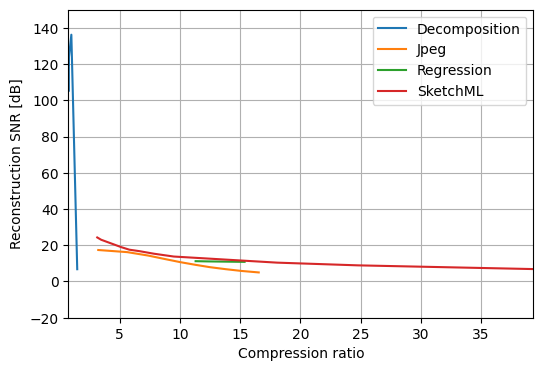

In [24]:
plt.figure(figsize=(6,4))
plt.plot(lowrank_decomposition_ratio, lowrank_decomposition_snr,label ="Decomposition")
plt.plot(lowrank_jpeg_ratio, lowrank_jpeg_snr,label ="Jpeg")
plt.plot(lowrank_regression_ratio, lowrank_regression_snr,label ="Regression")
plt.plot(lowrank_sketchml_ratio, lowrank_sketchml_snr,label ="SketchML")
plt.legend()
plt.ylim([-20,150])
plt.grid()
plt.autoscale(axis='x',tight=True)
plt.xlabel("Compression ratio")
plt.ylabel("Reconstruction SNR [dB]")

# Plotting